# Chapter 2: Introductory Examples

### Playing with Pandas to see what it can do!

In this chapter Wes walks you through various 

### 1. usa.gov data



In [3]:
# load data from a text file
path = 'pydata-book/ch02/usagov_bitly_data2012-03-16-1331923249.txt'

# now let's take a look at it
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [5]:
# let's make that prettier by using the `json` module.
import json

records = [json.loads(line) for line in open(path, 'rb')]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

That's much prettier! Now let's do something with the data.

In [13]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
# a lovely list comprehension that only pulls the tz's from recs that include one.

time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

So that's cool, but we need to do some **data cleaning** since some of the `tz`s are just `''`.

In [21]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts

def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

print("get_counts(time_zones):", get_counts(time_zones), '\n')

print("get_counts2(time_zones):", get_counts2(time_zones))

get_counts(time_zones): {'America/New_York': 1251, 'America/Denver': 191, 'America/Sao_Paulo': 33, 'Europe/Warsaw': 16, '': 521, 'America/Los_Angeles': 382, 'Asia/Hong_Kong': 10, 'Europe/Rome': 27, 'Africa/Ceuta': 2, 'Europe/Madrid': 35, 'Asia/Kuala_Lumpur': 3, 'Asia/Nicosia': 1, 'Europe/London': 74, 'Pacific/Honolulu': 36, 'America/Chicago': 400, 'Europe/Malta': 2, 'Europe/Lisbon': 8, 'Europe/Paris': 14, 'Europe/Copenhagen': 5, 'America/Mazatlan': 1, 'Europe/Dublin': 3, 'Europe/Brussels': 4, 'America/Vancouver': 12, 'Europe/Amsterdam': 22, 'Europe/Prague': 10, 'Europe/Stockholm': 14, 'America/Anchorage': 5, 'Asia/Bangkok': 6, 'Europe/Berlin': 28, 'America/Rainy_River': 25, 'Europe/Budapest': 5, 'Asia/Tokyo': 37, 'Europe/Vienna': 6, 'America/Phoenix': 20, 'Asia/Jerusalem': 3, 'Asia/Karachi': 3, 'America/Bogota': 3, 'America/Indianapolis': 20, 'America/Montreal': 9, 'Asia/Calcutta': 9, 'Europe/Skopje': 1, 'Asia/Beirut': 4, 'Australia/NSW': 6, 'Chile/Continental': 6, 'America/Halifax': 4

In [26]:
counts = get_counts(time_zones)
counts['America/New_York']


1251

In [28]:
# for the top 10 time zones:

def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    # that creates a list of tuples for all k:v pairs in the dict
    value_key_pairs.sort()
    # sort them, then slize the last 10 to return
    return value_key_pairs[-n:]

top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [29]:
# but why not use collections.Counter?

from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### Using `pandas`

In [32]:
from pandas import DataFrame, Series
import pandas as pd

frame = DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [33]:
frame.head()  # just for me.

_heartbeat_                                                  a  \
0          NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
1          NaN                             GoogleMaps/RochesterNY   
2          NaN  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...   
3          NaN  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...   
4          NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   

               al   c          cy       g  gr       h            hc  \
0  en-US,en;q=0.8  US     Danvers  A6qOVH  MA  wfLQtf  1.331823e+09   
1             NaN  US       Provo  mwszkS  UT  mwszkS  1.308262e+09   
2           en-US  US  Washington  xxr3Qb  DC  xxr3Qb  1.331920e+09   
3           pt-br  BR        Braz  zCaLwp  27  zUtuOu  1.331923e+09   
4  en-US,en;q=0.8  US  Shrewsbury  9b6kNl  MA  9b6kNl  1.273672e+09   

          hh   kw         l                        ll   nk  \
0  1.usa.gov  NaN   orofrog   [42.576698, -70.954903]  1.0   
1       j.mp  NaN     bitly  [40.218102, -111.613297]  0.0   
2  1.usa.gov  NaN     bitly     [38.9007, -77.043098]  1.0   
3  1.usa.gov  NaN  alelex88  [-23.549999, -46.616699]  0.0   
4     bit.ly  NaN     bitly   [42.286499, -71.714699]  0.0   

                                                   r             t  \
0  http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...  1.331923e+09   
1                           http://www.AwareMap.com/  1.331923e+09   
2                               http://t.co/03elZC4Q  1.331923e+09   
3                                             direct  1.331923e+09   
4                http://www.shrewsbury-ma.gov/selco/  1.331923e+09   

                  tz                                                  u  
0   America/New_York        http://www.ncbi.nlm.nih.gov/pubmed/22415991  
1     America/Denver        http://www.monroecounty.gov/etc/911/rss.php  
2   America/New_York  http://boxer.senate.gov/en/press/releases/0316...  
3  America/Sao_Paulo            http://apod.nasa.gov/apod/ap120312.html  
4   America/New_York  http://www.shrewsbury-ma.gov/egov/gallery/1341...

In [34]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [35]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

Now let's plot some data!

In [42]:
# first, something I learned at PyData Seattle, to make matplotlib work inline.
%matplotlib inline

In [40]:
# before plotting, we need to clean!
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'

# and we will create `tz_counts` to plot from using this cleaned data!
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

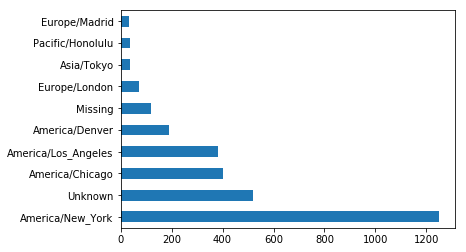

In [43]:
tz_counts[:10].plot(kind='barh', rot=0)

In [46]:
# Let's look at what browser users were on.

results = Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [47]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [55]:
# now, how about looking at top time zones for Windows and non-Windows users

import numpy as np  # the book was missing this part?

# clean data; this creates a new frame from a list of those `a` elements that are not Null
cframe = frame[frame.a.notnull()]

# select operating system
operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
operating_system[:5]


array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='<U11')

In [58]:
by_tz_os = cframe.groupby(['tz', operating_system])

agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

Not Windows  Windows
tz                                                  
                                      245.0    276.0
Africa/Cairo                            0.0      3.0
Africa/Casablanca                       0.0      1.0
Africa/Ceuta                            0.0      2.0
Africa/Johannesburg                     0.0      1.0
Africa/Lusaka                           0.0      1.0
America/Anchorage                       4.0      1.0
America/Argentina/Buenos_Aires          1.0      0.0
America/Argentina/Cordoba               0.0      1.0
America/Argentina/Mendoza               0.0      1.0

In [60]:
# now an indirect index array from the row counts in agg_counts:

indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [62]:
# use `take` to select rows in order
count_subset = agg_counts.take(indexer)[-10:]

count_subset

Not Windows  Windows
tz                                       
America/Sao_Paulo           13.0     20.0
Europe/Madrid               16.0     19.0
Pacific/Honolulu             0.0     36.0
Asia/Tokyo                   2.0     35.0
Europe/London               43.0     31.0
America/Denver             132.0     59.0
America/Los_Angeles        130.0    252.0
America/Chicago            115.0    285.0
                           245.0    276.0
America/New_York           339.0    912.0

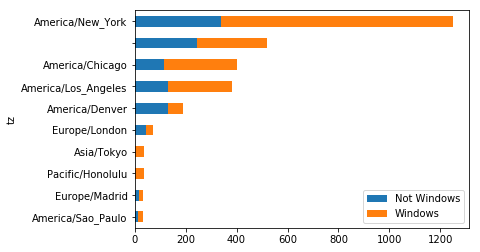

In [63]:
# to plot in a stacked bar plot,
# which is to say we stack Not Windows on top of Windows:

count_subset.plot(kind='barh', stacked=True)

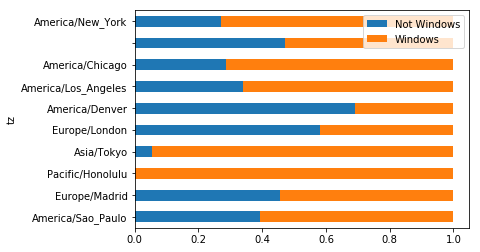

In [64]:
# now we will normalize the rows to see relative percentages of Windows users

normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)

Let's be honest, there's quite a bit to absorb from the above.

## MovieLens 1M Data Set

Movie ratings data from 90s and 00s.

In [77]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('pydata-book/ch02/movielens/users.dat', sep='::', header=None, names=unames, engine='python')

In [73]:
users[:5]

user_id gender  age  occupation    zip
0        1      F    1          10  48067
1        2      M   56          16  70072
2        3      M   25          15  55117
3        4      M   45           7  02460
4        5      M   25          20  55455

In [86]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('pydata-book/ch02/movielens/ratings.dat', sep='::', header=None, names=rnames, engine='python')

ratings[:5]

user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291

In [87]:
mnames = ['movie_id', 'title', 'genre']
movies = pd.read_table('pydata-book/ch02/movielens/movies.dat', sep='::', header=None, names=mnames, engine='python')
movies[:5]

movie_id                               title                         genre
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy

In [89]:
# merge the three data sets together.
# first, merge ratings with users, then merge that with movies

data = pd.merge(pd.merge(ratings, users), movies)

In [90]:
data

user_id  movie_id  rating   timestamp gender  age  occupation    zip  \
0              1      1193       5   978300760      F    1          10  48067   
1              2      1193       5   978298413      M   56          16  70072   
2             12      1193       4   978220179      M   25          12  32793   
3             15      1193       4   978199279      M   25           7  22903   
4             17      1193       5   978158471      M   50           1  95350   
5             18      1193       4   978156168      F   18           3  95825   
6             19      1193       5   982730936      M    1          10  48073   
7             24      1193       5   978136709      F   25           7  10023   
8             28      1193       3   978125194      F   25           1  14607   
9             33      1193       5   978557765      M   45           3  55421   
10            39      1193       5   978043535      M   18           4  61820   
11            42      1193       3   978038981      M   25           8  24502   
12            44      1193       4   978018995      M   45          17  98052   
13            47      1193       4   977978345      M   18           4  94305   
14            48      1193       4   977975061      M   25           4  92107   
15            49      1193       4   978813972      M   18          12  77084   
16            53      1193       5   977946400      M   25           0  96931   
17            54      1193       5   977944039      M   50           1  56723   
18            58      1193       5   977933866      M   25           2  30303   
19            59      1193       4   977934292      F   50           1  55413   
20            62      1193       4   977968584      F   35           3  98105   
21            80      1193       4   977786172      M   56           1  49327   
22            81      1193       5   977785864      F   25           0  60640   
23            88      1193       5   977694161      F   45           1  02476   
24            89      1193       5   977683596      F   56           9  85749   
25            95      1193       5   977626632      M   45           0  98201   
26            96      1193       3   977621789      F   25          16  78028   
27            99      1193       2   982791053      F    1          10  19390   
28           102      1193       5  1040737607      M   35          19  20871   
29           104      1193       2   977546620      M   25          12  00926   
...          ...       ...     ...         ...    ...  ...         ...    ...   
1000179     4933      3084       3   962757020      M   25          15  94040   
1000180     4802      2218       2  1014866656      M   56           1  40601   
1000181     4812      2308       2   962932391      M   18          14  25301   
1000182     4874       624       4   962781918      F   25           4  70808   
1000183     5059      1434       4   962484364      M   45          16  22652   
1000184     5947      1434       4   957190428      F   45          16  97215   
1000185     5077      1868       3   962417299      M   25           2  20037   
1000186     5944      1868       1   957197520      F   18          10  27606   
1000187     5105       404       3   962337582      M   50           7  18977   
1000188     5185       404       4   963402617      F   35           4  44485   
1000189     5532       404       5   959619841      M   25          17  27408   
1000190     5543       404       3   960127592      M   25          17  97401   
1000191     5220      2543       3   961546137      M   25           7  91436   
1000192     5754      2543       4   958272316      F   18           1  60640   
1000193     5227       591       3   961475931      M   18          10  64050   
1000194     5795       591       1   958145253      M   25           1  92688   
1000195     5313      3656       5   960920392      M   56           0  55406   
1000196     5328      2438       4   960

In [92]:
data.ix[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genre                                          Drama
Name: 0, dtype: object

< [Chapter 0](/notebooks/chapter00.ipynb) | Chapter 2 | [Chapter 3](Chapter03.ipynb) >